# Определение перспективного тарифа для телеком компании


ПРОЕКТНАЯ РАБОТА - СПРИНТ 4

<a name="title"></a>
### Содержание

[Описание проекта](#info)
1. [Открытие данных](#start)
2. [Подготовка данных](#preprocessing)
  - [Предобработка](#null)
  - [Типы данных](#data_type)  
  - [Добавление данных](#data_add) 
3. [Анализ данных](#analitika)  
4. [Проверка гипотез](#gipoteza)
    * [Гипотеза "Тарифы"](#gipoteza01)
    * [Гипотеза "Россия не Москва"](#gipoteza02)    
5. [Общий вывод](#general)

<a name="info"></a>
## Описание проекта
В нашем распоряжении данные федерального оператора сотовой связи — данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.. 

**Цель** - скорректировать рекламный бюджет.

**Задача** - проанализировать поведение клиентов и сделать вывод — какой из 2-х тарифных планов лучше. 

Это поможет коммерческому департаменту принять решение по корректировке рекламного бюджета.


**Данные предоставлены в формате csv.**

[к содержанию...](#title)

<a name="start"></a>
# 1. Открытие и изучение вводных данных
Откроем данные и проведем предварительный анализ составив перечень работ для шага 2 "Подготовка данных"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as DT
import math
from scipy import stats as st
from scipy.stats import levene
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
calls = pd.read_csv('datasets/calls.csv')
internet = pd.read_csv('datasets/internet.csv')
messages = pd.read_csv('datasets/messages.csv')
tariffs = pd.read_csv('datasets/tariffs.csv')
users = pd.read_csv('datasets/users.csv')


## users

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
users.sample(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
37,1037,73,NaN,Череповец,Изольда,Архипова,2018-10-13,smart
288,1288,63,NaN,Улан-Удэ,Григорий,Давыдов,2018-09-09,smart
102,1102,28,NaN,Москва,Марта,Королькова,2018-06-16,smart


Ненулевых значений в столбце *churn_date* не много, осмотрим их, чтобы понять с чем мы имеем дело.

In [5]:
users_na = users.dropna()
users_na.sort_values(by = 'churn_date')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
254,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra
71,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart
255,1255,40,2018-09-02,Саранск,Серафима,Пономарева,2018-02-19,ultra
480,1480,29,2018-09-26,Новокузнецк,Гелена,Емельянова,2018-02-14,smart
392,1392,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
191,1191,64,2018-10-03,Набережные Челны,Александр,Акиндинов,2018-06-30,smart
265,1265,24,2018-10-04,Омск,Радим,Адамов,2018-06-24,ultra
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


In [6]:
users.describe(include = 'all')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500.00,500.00,38,500,500,500,500,500
unique,nan,nan,33,76,246,419,270,2
top,nan,nan,2018-12-09,Москва,Радим,Андреенко,2018-05-28,smart
freq,nan,nan,2,99,6,5,8,351
mean,"1,249.50",46.59,NaN,NaN,NaN,NaN,NaN,NaN
std,144.48,16.67,NaN,NaN,NaN,NaN,NaN,NaN
min,"1,000.00",18.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,"1,124.75",32.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,"1,249.50",46.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,"1,374.25",62.00,NaN,NaN,NaN,NaN,NaN,NaN


### Вывод:
В выборке содержаться данные 500 пользователей и 76 городов. Пропуски обнаружены в столбце 'churn_date' и согласно ТЗ говорят о том, что на момент выгрузки договор с пользователем действовал. **Заменим  пропуски в 'churn_date' крайней датой 2018 года**. Так же **изменим тип столбцов 'churn_date' и 'reg_date' на date**

## tariffs

In [7]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод:
Данные соответствуют условиям ТЗ.

## calls

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls.sample(3)

,id,call_date,duration,user_id
198185,1486_18,2018-11-20,2.11,1486
199138,1491_97,2018-12-01,12.54,1491
31302,1078_646,2018-10-10,12.92,1078


In [10]:
calls.describe(include = 'all')

,id,call_date,duration,user_id
count,202607,202607,"202,607.00","202,607.00"
unique,202607,365,nan,nan
top,1102_4,2018-12-31,nan,nan
freq,1,1435,nan,nan
mean,NaN,NaN,6.76,"1,253.94"
std,NaN,NaN,5.84,144.72
min,NaN,NaN,0.00,"1,000.00"
25%,NaN,NaN,1.30,"1,126.00"
50%,NaN,NaN,6.00,"1,260.00"
75%,NaN,NaN,10.70,"1,379.00"


### Вывод:
Данные содержат 202.6 тысяч строк, **пропуски в данных отсутствуют**, значения столбца 'id' полностью уникальны. Количество уникальных значений в столбце 'call_date' = 365, учитывая, что 2018 невысокосный год, наша выборка охватывает все его 365 дней. 

**Замены типа данных на date требует столбец 'call_date'**. 

Учитывая что «Мегалайн» всегда округляет вверх значения минут, нужно провести данное округление вверх до целых и изменить **тип данных столбца 'duration' на int**. Так же необходимо провести **анализ распределения столбца 'duration'**.

## internet

In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
internet.sample(3)

,Unnamed: 0,id,mb_used,session_date,user_id
58626,58626,1197_261,401.62,2018-08-06,1197
54170,54170,1180_661,204.75,2018-05-19,1180
20085,20085,1067_186,250.19,2018-05-21,1067


In [13]:
internet.describe(include = 'all')

,Unnamed: 0,id,mb_used,session_date,user_id
count,"149,396.00",149396,"149,396.00",149396,"149,396.00"
unique,nan,149396,nan,365,nan
top,nan,1102_4,nan,2018-12-31,nan
freq,nan,1,nan,1057,nan
mean,"74,697.50",NaN,370.19,NaN,"1,252.10"
std,"43,127.05",NaN,278.30,NaN,144.05
min,0.00,NaN,0.00,NaN,"1,000.00"
25%,"37,348.75",NaN,138.19,NaN,"1,130.00"
50%,"74,697.50",NaN,348.01,NaN,"1,251.00"
75%,"112,046.25",NaN,559.55,NaN,"1,380.00"


### Вывод:
Данные содержат 149 тысяч строк, **пропуски в данных отсутствуют**, значения столбца 'id' полностью уникальны. Количество уникальных значений в столбце 'session_date' = 365. 

**Замены типа данных на date требует столбец 'session_date'**. 

Учитывая что «Мегалайн» всегда округляет вверх значения мегабайтов, нужно провести данное округление вверх до целых и изменить **тип данных столбца 'mb_used' на int**. Так же необходимо провести **анализ распределения столбца 'mb_used'**.

## messages

In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
messages.sample(10)

,id,message_date,user_id
39980,1171_124,2018-09-19,1171
65328,1281_215,2018-12-07,1281
30289,1134_7,2018-06-23,1134
16868,1076_17,2018-09-18,1076
94543,1385_1252,2018-11-06,1385
113291,1459_47,2018-11-24,1459
25866,1106_19,2018-07-19,1106
41105,1174_450,2018-10-10,1174
33950,1147_92,2018-09-20,1147
86984,1358_613,2018-09-24,1358


In [16]:
messages.describe(include = 'all')

,id,message_date,user_id
count,123036,123036,"123,036.00"
unique,123036,364,nan
top,1102_4,2018-12-31,nan
freq,1,859,nan
mean,NaN,NaN,"1,256.99"
std,NaN,NaN,143.52
min,NaN,NaN,"1,000.00"
25%,NaN,NaN,"1,134.00"
50%,NaN,NaN,"1,271.00"
75%,NaN,NaN,"1,381.00"


### Вывод:
Данные содержат 123 тысяч строк, **пропуски в данных отсутствуют**, значения столбца 'id' полностью уникальны. Количество уникальных значений в столбце 'call_date' = 364, интересно но у нас пропал один день, рассмотрим это на следующем шаге. 

Заменим тип данных на date в столбец 'message_date'** и проанализируем данный столбец.

[к содержанию...](#title)

 <a name="preprocessing"></a>
# 2. Подготовка данных
<a name="null"></a>

## 2.1 Предобработка
На основании сделанных выше выводов...

**Провести анализ**:

    calls -столбец'duration'
    internet - столбец 'mb_used'
    message - 'message_date'.

**Округлить вверх до целых и изменить тип данных на int**:

    calls -  'duration'
    internet - 'mb_used'

**Заменить пропуски в 'churn_date' на 31.12.2018 года**.

**Обработать столбцы с датами**:

    users - 'churn_date' и 'reg_date'
    calls - 'call_date'
    internet - 'session_date'
    message - 'message_date' 


### Анализ *calls.duration*

In [17]:
calls.duration.describe()

count   202,607.00
mean          6.76
std           5.84
min           0.00
25%           1.30
50%           6.00
75%          10.70
max          38.00
Name: duration, dtype: float64

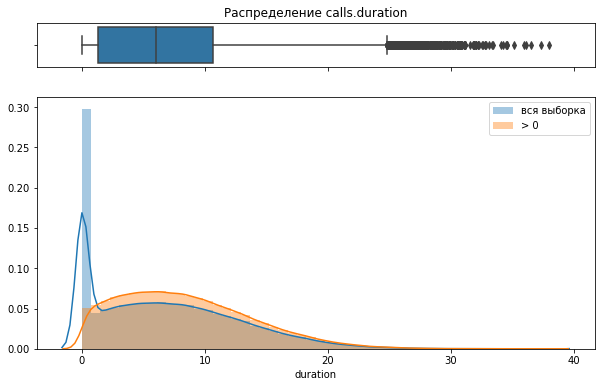

In [18]:
f, (ax_box, ax_hist) =plt.subplots(2, figsize=(10, 6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(calls['duration'], ax=ax_box)

sns.distplot(calls['duration'],ax=ax_hist, hist=True, kde=True,  label='вся выборка')
sns.distplot(calls.query('duration > 0')['duration'],ax=ax_hist, hist=True, kde=True, label='> 0')

ax_box.set(xlabel='')
ax_box.set(title='Распределение calls.duration')
ax_hist.legend()


plt.show()

Проверим у скольки пользователей встречаются нулевые значения:

In [19]:
len(calls.query('duration == 0').user_id.unique())

492

In [20]:
len(calls.user_id.unique())

492

#### Вывод: 
Принципиальным вопросом по данному столбцу является то как поступить с нулевыми значениями. Попробуем разобраться...

**Вводные**:

0. Ситуация не уникальна и **встречается у 100% пользователей**.

1. Данные звонки **не могут быть звонками** продолжительностью **меньше минуты**, которые не корректно отобразились в выгрузке - это невозможно так как по условиям ТЗ округление времени звонка происходит в большую сторону до целой минуты, а нетарифицируемых исходящих секунд тарифы не предусматривают.
2. Данные звонки могут быть или **безответными вызовами** самого пользователя, **или** же его **входящим трафиком** который не тарифицируется согласно законодательству.

**Исходя из этого**: Данные звонки **не внесут вклад** (а соответственно и погрешность) **в формирование выручки** (а это главная задача нашего исследования), **но внесут искажения в анализ статистических величин, искажая среднее количество**.

**Поэтому**:Определим и зафиксируем для себя отношение не отвеченных вызовов к общему числу вызовов и удалим строки с нулевым значением.

In [21]:
numb_null_calls = calls.query('duration == 0').duration.count()
namb_ttl_calls = calls.duration.count()
print('Доля не отвеченных вызовов:', numb_null_calls / namb_ttl_calls)
calls = calls.query('duration != 0')
calls = calls.reset_index(drop=True)

Доля не отвеченных вызовов: 0.19551644316336553


### Анализ *internet.mb_used*

In [22]:
internet.mb_used.describe()

count   149,396.00
mean        370.19
std         278.30
min           0.00
25%         138.19
50%         348.01
75%         559.55
max       1,724.83
Name: mb_used, dtype: float64

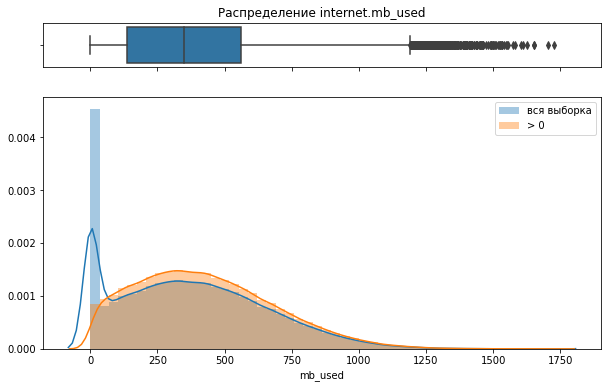

In [23]:
f, (ax_box, ax_hist) =plt.subplots(2, figsize=(10, 6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(internet['mb_used'], ax=ax_box)
sns.distplot(internet['mb_used'],ax=ax_hist, hist=True, kde=True,  label='вся выборка')
sns.distplot(internet.query('mb_used > 0')['mb_used'],ax=ax_hist, hist=True, kde=True, label='> 0')

ax_box.set(xlabel='')
ax_box.set(title='Распределение internet.mb_used')
ax_hist.legend()


plt.show()

Проверим у скольки пользователей встречаются нулевые значения:

In [24]:
len(internet.query('mb_used == 0').user_id.unique())

494

In [25]:
len(internet.user_id.unique())

497

#### Вывод: 
Принципиальным вопросом по данному столбцу является то как поступить с нулевыми значениями. Попробуем разобраться...

**Вводные**:

1. Ситуация не уникальна и встречается у 494 из 497 пользователей (*интересно есть ли трафик у оставшихся 3? )))*).
2. Предположим, что речь идет о технических сессиях самого оператора, сбоях подключения или же например о бесплатном трафике для мессенджера.

**Исходя из этого**: Рассуждения аналогичны "нулевым" звонкам, в рамках данного исследования они нам не интересны и их наличие никак не скажется на результатах исследования.

**Поэтому**: Удаляем строки с нулевыми значениями.

In [26]:
internet = internet.query('mb_used != 0')
internet = internet.reset_index(drop=True)

### Анализ *messages.message_date*
Посмотрим, чтоже за дату мы тут потеряли...
С генерируем список всех дат 2018 года и посмотрим чего не хватает:

In [27]:
start_date = DT.datetime(2018, 1, 1)
end_date = DT.datetime(2018, 12, 31)

res = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date)
).strftime('%Y-%m-%d').tolist()

res[0:5]

['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05']

In [28]:
for i in res:
    if i in messages['message_date'].unique():
        pass
    else: print(i)
    
        

2018-01-01


О как! Видимо оператор подарил всем бесплатные смски в честь 1 января.

### Округление вверх до целых *calls.duration* и *internet.mb_used*
    
    
    

Напишем небольшую функцию для округления вверх значений столбца *column* датафрейма *data*:

In [29]:
def round_up(data, column):
    data[column] = np.ceil(data[column])

In [30]:
round_up(internet, 'mb_used')

In [31]:
internet.sample(3)

,Unnamed: 0,id,mb_used,session_date,user_id
73988,85654,1291_210,59.00,2018-05-21,1291
84906,98238,1330_446,39.00,2018-06-04,1330
42182,48870,1168_638,"1,061.00",2018-03-23,1168


In [32]:
round_up(calls, 'duration')

In [33]:
calls.sample(3)

,id,call_date,duration,user_id
117851,1374_109,2018-10-14,9.00,1374
51593,1164_392,2018-04-05,3.00,1164
121774,1378_617,2018-11-19,5.00,1378


### Пропуски в *user.churn_date*
Заменим пропуски столбца *churn_date* на 31 декабря 2018.

In [34]:
users = users.fillna('2018-12-31')

[к содержанию...](#title)

<a name="data_type"></a>
## 2.2 Типы данных

### float к int 

In [35]:
calls['duration'] = calls['duration'].astype('int')

In [36]:
internet['mb_used'] = internet['mb_used'].astype('int')

### str к date
    users - 'churn_date' и 'reg_date'
    calls - 'call_date'
    internet - 'session_date'
    message - 'message_date' 

In [37]:
def str_to_date(data, column):
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%dT%H:%M:%S')

In [38]:
str_to_date(users, 'churn_date')
str_to_date(users, 'reg_date')
str_to_date(calls, 'call_date')
str_to_date(internet, 'session_date')
str_to_date(messages, 'message_date')

<a name="data_add"></a>
## 2.3 Добавление данных

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [39]:
calls['month'] = calls['call_date'].dt.month
calls.sample(3)

,id,call_date,duration,user_id,month
159696,1488_10,2018-11-17,3,1488,11
145452,1453_104,2018-10-03,12,1453,10
52168,1168_101,2018-03-13,13,1168,3


In [40]:
calls_gr = calls.groupby(['user_id', 'month'])['duration']\
                .agg(['count','sum'])
calls_gr

count  sum
user_id month            
1000    5         17  159
        6         28  172
        7         41  340
        8         42  408
        9         46  466
...              ...  ...
1498    10        30  247
1499    9          8   70
        10        44  449
        11        62  612
        12        56  492

[3168 rows x 2 columns]

### Количество отправленных сообщений по месяцам

In [41]:
messages['month'] = messages['message_date'].dt.month
messages.sample(3)

,id,message_date,user_id,month
86365,1357_158,2018-09-07,1357,9
89140,1373_152,2018-05-20,1373,5
63493,1277_170,2018-11-19,1277,11


In [42]:
messages_gr = messages.groupby(['user_id', 'month'])['user_id']\
                      .agg(['count'])
messages_gr

count
user_id month       
1000    5         22
        6         60
        7         75
        8         81
        9         57
...              ...
1498    10        42
1499    9         11
        10        48
        11        59
        12        66

[2717 rows x 1 columns]

### Объем израсходованного интернет-трафика по месяцам

In [43]:
internet['month'] = internet['session_date'].dt.month
internet.sample(3)

,Unnamed: 0,id,mb_used,session_date,user_id,month
72969,84455,1287_10,662,2018-11-18,1287,11
23989,27884,1098_58,183,2018-07-19,1098,7
32630,37887,1133_54,277,2018-11-17,1133,11


In [44]:
internet_gr = internet.groupby(['user_id', 'month'])['mb_used']\
                      .agg(['sum'])
internet_gr

sum
user_id month       
1000    5       2256
        6      23257
        7      14016
        8      14070
        9      14581
...              ...
1498    10     20604
1499    9       1848
        10     17809
        11     17984
        12     13077

[3201 rows x 1 columns]

### Расчет помесячной выручки каждого пользователя

Объединим данные сводных таблиц:

In [45]:
call_int_gr = calls_gr.merge(internet_gr, on=['user_id', 'month'], how='outer')
all_gr = call_int_gr.merge(messages_gr, on=['user_id', 'month'], how='outer')
all_gr.reset_index(inplace=True)
all_gr.describe()

,user_id,month,count_x,sum_x,sum_y,count_y
count,"3,214.00","3,214.00","3,168.00","3,168.00","3,201.00","2,717.00"
mean,"1,251.59",8.32,51.45,457.80,"17,297.55",45.28
std,144.66,2.91,26.44,237.42,"7,513.50",35.05
min,"1,000.00",1.00,1.00,1.00,202.00,1.00
25%,"1,125.00",6.00,33.00,290.75,"12,567.00",19.00
50%,"1,253.00",9.00,50.00,447.50,"16,986.00",38.00
75%,"1,378.75",11.00,67.00,592.25,"21,458.00",63.00
max,"1,499.00",12.00,190.00,"1,673.00","49,789.00",224.00


Добавим информацию о пользователях и тарифах сформировав таким образом конечный датафрейм:

In [46]:
all_gr_user = all_gr.merge(users, on='user_id', how='left')
df = all_gr_user.merge(tariffs, left_on='tariff', right_on='tariff_name', how='left')
df

,user_id,month,count_x,sum_x,sum_y,count_y,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,17.00,159.00,"2,256.00",22.00,52,2018-12-31,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,28.00,172.00,"23,257.00",60.00,52,2018-12-31,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,41.00,340.00,"14,016.00",75.00,52,2018-12-31,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,42.00,408.00,"14,070.00",81.00,52,2018-12-31,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,46.00,466.00,"14,581.00",57.00,52,2018-12-31,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,nan,nan,"11,066.00",17.00,35,2018-12-31,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3210,1489,9,nan,nan,"17,232.00",32.00,35,2018-12-31,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3211,1489,10,nan,nan,"19,588.00",21.00,35,2018-12-31,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart
3212,1489,11,nan,nan,"17,516.00",20.00,35,2018-12-31,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,smart


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   count_x                3168 non-null   float64       
 3   sum_x                  3168 non-null   float64       
 4   sum_y                  3201 non-null   float64       
 5   count_y                2717 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             3214 non-null   datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

#### Слегка приберемся в шапке, пропусках и типах данных:

In [48]:
df.columns = ['user_id', 'month', 'minutes_count', 'minutes', 'trafic', 'messages', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name']

df = df.fillna(0)
for column in['minutes_count', 'minutes', 'trafic', 'messages']:
    df[column] = df[column].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   minutes_count          3214 non-null   int64         
 3   minutes                3214 non-null   int64         
 4   trafic                 3214 non-null   int64         
 5   messages               3214 non-null   int64         
 6   age                    3214 non-null   int64         
 7   churn_date             3214 non-null   datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

#### Проверим на "косых" цифрах исходные и полученный датафреймы:

In [49]:
calls.duration.sum() == df.minutes.sum()

True

In [50]:
internet.mb_used.sum()== df.trafic.sum()

True

In [51]:
messages.message_date.count() == df.messages.sum()

True

#### Проведенные с исходными данными манипуляции корректны, перейдем к расчету выручки:

In [52]:
def revenue(minutes, minutes_included, rub_per_minute,\
            trafic, mb_per_month_included, rub_per_gb,\
            messages, messages_included, rub_per_message,\
            churn_date, month, reg_date, rub_monthly_fee):
    if (minutes - minutes_included)> 0:
        minutes_rev = (minutes - minutes_included)*rub_per_minute
    else: minutes_rev = 0
    if (trafic - mb_per_month_included)> 0:
        trafic_rev = (trafic - mb_per_month_included)/1024*rub_per_gb
    else: trafic_rev = 0
    if (messages - messages_included)> 0:
        messages_rev = (messages - messages_included)*rub_per_message
    else: messages_rev = 0
    if reg_date.month <= month <=churn_date.month:
        reven = minutes_rev + trafic_rev + messages_rev + rub_monthly_fee
    else: reven = 0
    
    return reven

*Проверим работоспособность))) ....*

In [53]:
a = pd.to_datetime('2018-10-16', format='%Y-%m-%d')
b = pd.to_datetime('2018-6-30', format='%Y-%m-%d')
revenue(100, 90, 10, 2024, 3024, 1, 80, 90, 0.5, a, 9, b, 1000)

1100

In [54]:
for i in range(len(df)):
    df.loc[i, 'reven'] = revenue(df.loc[i, 'minutes'], df.loc[i, 'minutes_included'], df.loc[i, 'rub_per_minute'],\
            df.loc[i, 'trafic'], df.loc[i, 'mb_per_month_included'], df.loc[i, 'rub_per_gb'],\
            df.loc[i, 'messages'], df.loc[i, 'messages_included'], df.loc[i, 'rub_per_message'],\
            df.loc[i, 'churn_date'], df.loc[i, 'month'], df.loc[i, 'reg_date'],\
            df.loc[i, 'rub_monthly_fee'])
    

In [55]:
df['reven'].describe()

count   3,214.00
mean    1,486.86
std       783.96
min       550.00
25%       694.00
50%     1,563.18
75%     1,950.00
max     6,711.02
Name: reven, dtype: float64

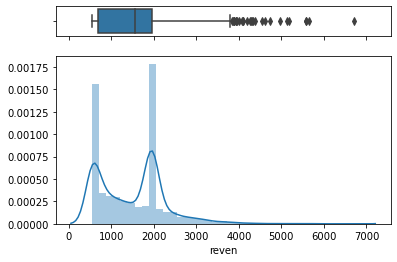

In [56]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["reven"], ax=ax_box)
sns.distplot(df["reven"], ax=ax_hist, hist=True, kde=True)
ax_box.set(xlabel='')
plt.show()

In [57]:
df['reven'].sum()

4778757.982421875

#### Пока все выглядит очень жизнеутверждающе: два пика на абонентских платах, ну и "болтуны"  в зоне выбросов для порядка.

### Вывод:
Данные готовы к анализу, приступим...

[к содержанию...](#title)

<a name="analitika"></a>
# 3. Анализ данных
**Проанализируем следующие параметры**:
- количество израсходованных минут 
- количество отправленных сообщений
- объем израсходованного интернет-трафика по месяцам
- выручки каждого пользователя

**Будем оценивать**:
- количественные показатели
- среднее, дисперсию и стандартное отклонение


Подготовим функцию которая опишет нам требуемые столбцы, 
в принципе вся эта информация уже известна нам из *describe()*, но сделаем это для тренировки...

In [58]:
def m_v_st(column):
    print('---------------------')
    print(column)
    print('---------------------')
    print('Smart')
    print('Среднее: {:.2f}'.format(df.query('tariff == "smart"')[column].mean()))
    print('Дисперсия: {:.2f}'.format(np.var(df.query('tariff == "smart"')[column])))
    print('Стандартное отклонение: {:.2f}'.format(np.sqrt(np.var(df.query('tariff == "smart"')[column]))))
    print('Ultra')
    print('Среднее: {:.2f}'.format(df.query('tariff == "ultra"')[column].mean()))
    print('Дисперсия: {:.2f}'.format(np.var(df.query('tariff == "ultra"')[column])))
    print('Стандартное отклонение: {:.2f}'.format(np.sqrt(np.var(df.query('tariff == "ultra"')[column]))))
      

### Количество израсходованных минут разговора по месяцам

Проведем краткий анализ и опишем **распределение количества израсходованных минут разговора**, как этого требует ТЗ: построим гистограмму, определим среднее, дисперсию и стандартное отклонение, опишем распределение.
В предварительных выводах будем фиксировать 2 момента:

1. Оценивать статистические параметры распределеня величины в рамках года.
2. Оценивать средние значения параметра для одного пользователя в месяц.

In [59]:
df.groupby('tariff')['minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,"2,229.00",417.93,190.31,0.00,282.00,422.00,545.00,"1,435.00"
ultra,985.00,526.62,317.61,0.00,284.00,518.00,752.00,"1,673.00"


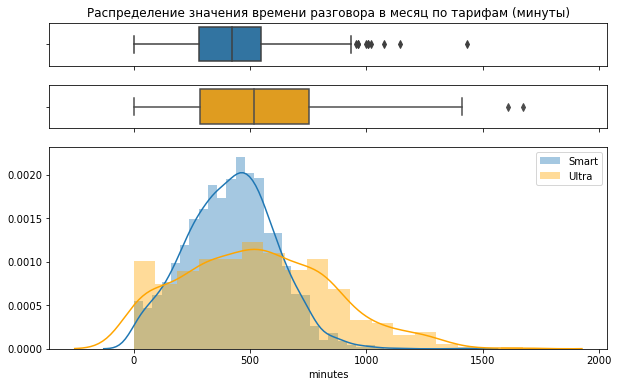

In [60]:
f, (ax1_box, ax2_box, ax_hist) =\
plt.subplots(3, figsize=(10, 6), sharex=True,\
             gridspec_kw={"height_ratios": (.15, .15, .70)})

sns.boxplot(df.query('tariff == "smart"')["minutes"], ax=ax1_box)
sns.boxplot(df.query('tariff == "ultra"')["minutes"], ax=ax2_box,\
            color='orange')
sns.distplot(df.query('tariff == "smart"')["minutes"],\
             ax=ax_hist, hist=True, kde=True, label='Smart')
sns.distplot(df.query('tariff == "ultra"')["minutes"],\
             ax=ax_hist, hist=True, kde=True, label='Ultra', color='orange')

ax1_box.set(xlabel='')
ax1_box.set(title='Распределение значения времени разговора в месяц по тарифам (минуты)')
ax2_box.set(xlabel='')
ax_hist.legend()
plt.show()

In [61]:
m_v_st('minutes')

---------------------
minutes
---------------------
Smart
Среднее: 417.93
Дисперсия: 36203.07
Стандартное отклонение: 190.27
Ultra
Среднее: 526.62
Дисперсия: 100771.22
Стандартное отклонение: 317.44


#### Оценим картину в разрезе 12 месяцев:

Красивый совмещенный график...

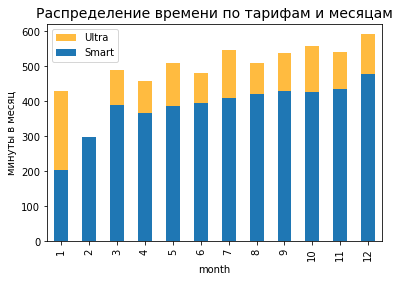

In [62]:

df.query('tariff == "ultra"').groupby('month')['minutes'].mean()\
  .plot(kind='bar', color='orange', alpha=0.75)
df.query('tariff == "smart"').groupby('month')['minutes'].mean()\
  .plot(kind='bar')
plt.title('Распределение времени по тарифам и месяцам', fontsize=14)
plt.ylabel('минуты в месяц')
plt.legend(['Ultra', 'Smart'])
plt.show()

... и не много сухих цифр)))
#### Smart:

In [63]:
df.query('tariff == "smart"').groupby('month')['minutes'].mean().describe()

count    12.00
mean    386.76
std      72.26
min     203.85
25%     382.30
50%     402.00
75%     426.75
max     478.56
Name: minutes, dtype: float64

#### Ultra:

In [64]:
df.query('tariff == "ultra"').groupby('month')['minutes'].mean().describe()

count    12.00
mean    495.93
std      77.45
min     297.12
25%     474.28
50%     510.55
75%     542.48
max     592.81
Name: minutes, dtype: float64

#### Вывод
1. Оба распределения являются нормальными. Оба практически не имеют скошенности (среднее и медиана лежат рядом). Распределение на тарифе "ultra" имеет большее стандартное отклонение, что хорошо видно из графиков.
2. Среднее время разговора одного пользователя в месяц для "ultra" - 496 минут, для "smart" - 389. Минивальное время разговоров 203, максимальное 593 минуты



### Количество отправленных сообщений по месяцам

Проведем краткий анализ и опишем **распределение количества сообщений**: построим гистограмму, определим среднее, дисперсию и стандартное отклонение, опишем распределение.

In [65]:
df.groupby('tariff')['messages'].describe()

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,"2,229.00",33.38,28.23,0.00,10.00,28.00,51.00,143.00
ultra,985.00,49.36,47.80,0.00,6.00,38.00,79.00,224.00


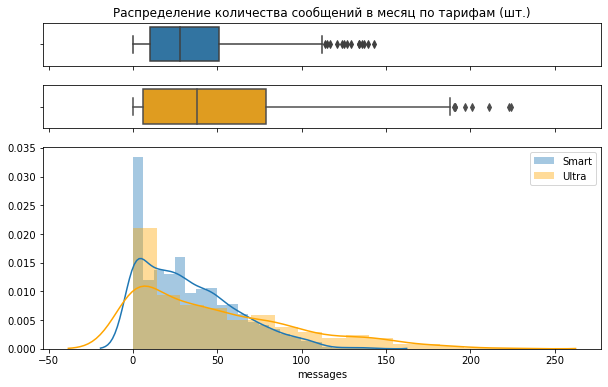

In [66]:
f, (ax1_box, ax2_box, ax_hist) =\
plt.subplots(3, figsize=(10, 6), sharex=True,\
             gridspec_kw={"height_ratios": (.15, .15, .70)})

sns.boxplot(df.query('tariff == "smart"')['messages'], ax=ax1_box)
sns.boxplot(df.query('tariff == "ultra"')['messages'], ax=ax2_box,\
            color='orange')
sns.distplot(df.query('tariff == "smart"')['messages'],\
             ax=ax_hist, hist=True, kde=True, label='Smart')
sns.distplot(df.query('tariff == "ultra"')['messages'],\
             ax=ax_hist, hist=True, kde=True, label='Ultra', color='orange')

ax1_box.set(xlabel='')
ax1_box.set(title='Распределение количества сообщений в месяц по тарифам (шт.)')
ax2_box.set(xlabel='')
ax_hist.legend()
plt.show()

In [67]:
m_v_st('messages')

---------------------
messages
---------------------
Smart
Среднее: 33.38
Дисперсия: 796.46
Стандартное отклонение: 28.22
Ultra
Среднее: 49.36
Дисперсия: 2282.95
Стандартное отклонение: 47.78


#### Оценим картину в разрезе 12 месяцев:

График...

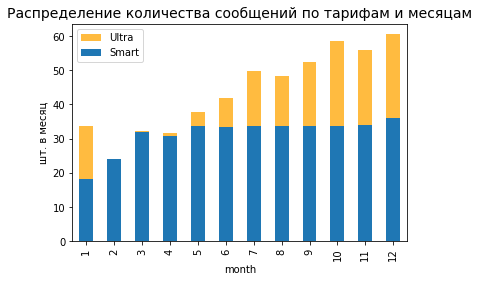

In [68]:
df.query('tariff == "ultra"').groupby('month')['messages'].mean()\
  .plot(kind='bar', color='orange', alpha=0.75)
df.query('tariff == "smart"').groupby('month')['messages'].mean()\
  .plot(kind='bar')
plt.title('Распределение количества сообщений по тарифам и месяцам', fontsize=14)
plt.ylabel('шт. в месяц')
plt.legend(['Ultra', 'Smart'])
plt.show()

... цифры
#### Smart:

In [69]:
df.query('tariff == "smart"').groupby('month')['messages'].mean().describe()

count   12.00
mean    31.41
std      5.10
min     18.24
25%     31.58
50%     33.64
75%     33.77
max     35.99
Name: messages, dtype: float64

#### Ultra:

In [70]:
df.query('tariff == "ultra"').groupby('month')['messages'].mean().describe()

count   12.00
mean    43.71
std     12.32
min     21.96
25%     33.41
50%     45.08
75%     53.16
max     60.61
Name: messages, dtype: float64

#### Вывод
1. Оба распределения являются нормальными. Оба скошены в право. Данные менее однородны по сравнению с временем разговоров и трафиком. 
2. Среднее количество сообщений одного пользователя в месяц для "ultra" - 44, для "smart" - 31.



### Объем израсходованного интернет-трафика по месяцам

Проведем краткий анализ и опишем **распределение интернет трафика**: построим гистограмму, определим среднее, дисперсию и стандартное отклонение, опишем распределение.

In [71]:
df.groupby('tariff')['trafic'].describe()

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,"2,229.00","16,229.19","5,877.58",0.00,"12,658.00","16,531.00","20,068.00","38,610.00"
ultra,985.00,"19,486.90","10,096.32",0.00,"11,785.00","19,324.00","26,863.00","49,789.00"


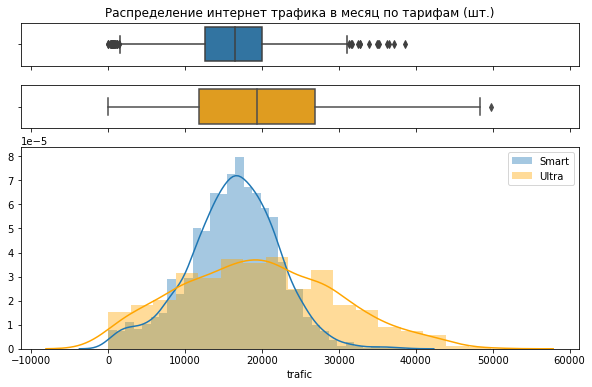

In [72]:
f, (ax1_box, ax2_box, ax_hist) =\
plt.subplots(3, figsize=(10, 6), sharex=True,\
             gridspec_kw={"height_ratios": (.15, .15, .70)})

sns.boxplot(df.query('tariff == "smart"')['trafic'], ax=ax1_box)
sns.boxplot(df.query('tariff == "ultra"')['trafic'], ax=ax2_box,\
            color='orange')
sns.distplot(df.query('tariff == "smart"')['trafic'],\
             ax=ax_hist, hist=True, kde=True, label='Smart')
sns.distplot(df.query('tariff == "ultra"')['trafic'],\
             ax=ax_hist, hist=True, kde=True, label='Ultra', color='orange')

ax1_box.set(xlabel='')
ax1_box.set(title='Распределение интернет трафика в месяц по тарифам (шт.)')
ax2_box.set(xlabel='')
ax_hist.legend()
plt.show()

In [73]:
m_v_st('trafic')

---------------------
trafic
---------------------
Smart
Среднее: 16229.19
Дисперсия: 34530412.74
Стандартное отклонение: 5876.26
Ultra
Среднее: 19486.90
Дисперсия: 101832133.11
Стандартное отклонение: 10091.19


#### Оценим картину в разрезе 12 месяцев:

График...

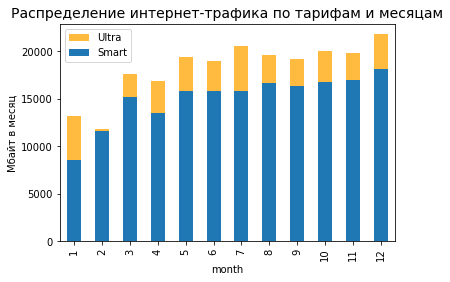

In [74]:
df.query('tariff == "ultra"').groupby('month')['trafic'].mean()\
  .plot(kind='bar', color='orange', alpha=0.75)
df.query('tariff == "smart"').groupby('month')['trafic'].mean()\
  .plot(kind='bar')
plt.title('Распределение интернет-трафика по тарифам и месяцам', fontsize=14)
plt.ylabel('Мбайт в месяц')
plt.legend(['Ultra', 'Smart'])
plt.show()

... цифры
#### Smart:

In [75]:
df.query('tariff == "smart"').groupby('month')['trafic'].mean().describe()

count       12.00
mean    15,077.69
std      2,674.74
min      8,524.44
25%     14,712.76
50%     15,819.98
75%     16,668.77
max     18,136.83
Name: trafic, dtype: float64

#### Ultra:

In [76]:
df.query('tariff == "ultra"').groupby('month')['trafic'].mean().describe()

count       12.00
mean    18,222.78
std      2,988.58
min     11,786.96
25%     17,374.93
50%     19,301.70
75%     19,869.95
max     21,813.59
Name: trafic, dtype: float64

#### Вывод
1. Оба распределения являются нормальными. Оба практически не имеют скошенности (среднее и медиана лежат рядом). Распределение на тарифе "ultra" имеет большее стандартное отклонение, что хорошо видно из графиков. 
2. Средний трафик одного пользователя в месяц для "ultra" - 18Гб, для "smart" - 15Гб. Минивальный среднемесячный трафик 8.5Гб, максимальное 21.5Гб



### Расчет помесячной выручки каждого пользователя

Проведем краткий анализ и опишем **распределение количества сообщений**: построим гистограмму, определим среднее, дисперсию и стандартное отклонение, опишем распределение.

In [77]:
df.groupby('tariff')['reven'].describe()

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,"2,229.00","1,233.35",787.69,550.00,550.00,959.90,"1,668.12","6,711.02"
ultra,985.00,"2,060.53",356.31,"1,950.00","1,950.00","1,950.00","1,950.00","4,743.31"


/home/den3d/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


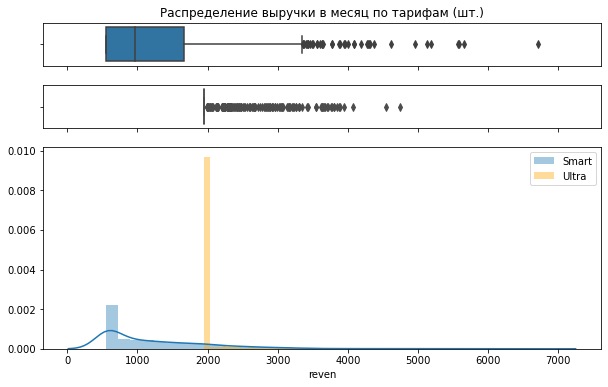

In [78]:
f, (ax1_box, ax2_box, ax_hist) =\
plt.subplots(3, figsize=(10, 6), sharex=True,\
             gridspec_kw={"height_ratios": (.15, .15, .70)})

sns.boxplot(df.query('tariff == "smart"')['reven'], ax=ax1_box)
sns.boxplot(df.query('tariff == "ultra"')['reven'], ax=ax2_box,\
            color='orange')
sns.distplot(df.query('tariff == "smart"')['reven'],\
             ax=ax_hist, hist=True, kde=True, label='Smart')
sns.distplot(df.query('reven > 0 & tariff == "ultra"')['reven'],\
             ax=ax_hist, hist=True, kde=True, label='Ultra', color='orange')

ax1_box.set(xlabel='')
ax1_box.set(title='Распределение выручки в месяц по тарифам (шт.)')
ax2_box.set(xlabel='')
ax_hist.legend()
plt.show()

In [79]:
len(df.query('tariff == "ultra" & reven > 1950').groupby('user_id')['reven'].mean())

43

Всего 43 пользователя тарифа Ultra превышают рамки абонентской платы, это 4,4%

In [80]:
len(df.query('tariff == "smart" & reven > 550').groupby('user_id')['reven'].mean())

333

На Smart картина совсем иная - 333 пользователя тарифа  превышают рамки абонентской платы, это 14,9%

In [81]:
m_v_st('reven')

---------------------
reven
---------------------
Smart
Среднее: 1233.35
Дисперсия: 620174.25
Стандартное отклонение: 787.51
Ultra
Среднее: 2060.53
Дисперсия: 126824.40
Стандартное отклонение: 356.12


#### Оценим картину в разрезе 12 месяцев:

Красивый совмещенный график...

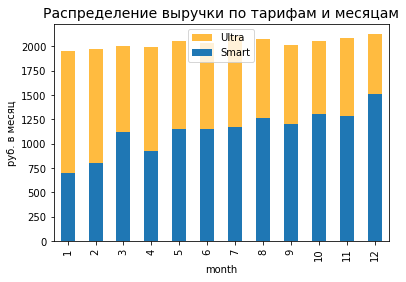

In [82]:
df.query('tariff == "ultra"').groupby('month')['reven'].mean()\
  .plot(kind='bar', color='orange', alpha=0.75)
df.query('tariff == "smart"').groupby('month')['reven'].mean()\
  .plot(kind='bar')
plt.title('Распределение выручки по тарифам и месяцам', fontsize=14)
plt.ylabel('руб. в месяц')
plt.legend(['Ultra', 'Smart'])
plt.show()

... и не много сухих цифр)))
#### Smart:

In [83]:
df.query('tariff == "smart"').groupby('month')['reven'].mean().describe()

count      12.00
mean    1,130.32
std       223.77
min       702.56
25%     1,069.37
50%     1,158.82
75%     1,264.71
max     1,505.87
Name: reven, dtype: float64

In [84]:
df.query('tariff == "smart"')['reven'].sum()

2749135.9609375

#### Ultra:

In [85]:
df.query('tariff == "ultra"').groupby('month')['reven'].mean().describe()

count      12.00
mean    2,038.92
std        53.82
min     1,950.00
25%     2,001.99
50%     2,043.51
75%     2,073.56
max     2,126.25
Name: reven, dtype: float64

In [86]:
df.query('tariff == "ultra"')['reven'].sum()

2029622.021484375

## Вывод

**Среднестатистический пользователь тарифа "smart" за месяц:**
- выговаривает **389 минут** (500 верхняя граница пакета)
- тратит **15 Гб** трафика (15 верхняя граница пакета)
- пишет **31 смс** (50 верхняя граница)
- платит оператору **1 130 рублей**


**Среднестатистический пользователь тарифа "ultra" за месяц:**
- выговаривает **496 минут** (3000 верхняя граница пакета)
- тратит **18 Гб** трафика (30 верхняя граница пакета)
- пишет **44 смс** (1000 верхняя граница)
- платит оператору **2 039 рублей**

Так же установлено, что всего **4,4% пользователей "ultra" не укладывается в рамки своего тарифа**, в то время как на **"smart" картина совсем иная и почти 15% пользователей выходят за его рамки**.



**Что касается распределения самих исследуемых величин** (минуты разговора, сообщения, трафик):
1. Параметры имеют **нормальное распределение**.
2. **Минуты разговора и трафик имеют симметричное распределение**.
3. Их распределение **на тарифе "ultra"** имеет **большее стандартное отклонение**, что хорошо видно из графиков.
4. **Данные о сообщениях** менее однородны по сравнению с временем разговоров и трафиком, а так же распределение на обоих тарифах **скошены в право**.


[к содержанию...](#title)

<a name="gipoteza"></a>
# 4. Проверка гипотез

<a name="gipoteza01"></a>
## Гипотеза "Тарифы"

**Собственно сама гипотеза**: "*средняя выручка пользователей тарифов "Ultra" и "Smart" различается*"

Тогда:

**Н0**: "*средняя выручка пользователей тарифов "Ultra" и "Smart" равна*"

**Н1**: "*средняя выручка пользователей тарифов "Ultra" и "Smart" различается*"

Примем значение alpha 5%

In [87]:
df_ultra = df.query('tariff == "ultra"')
df_smart = df.query('tariff == "smart"')

result_1 = st.ttest_ind(df_ultra['reven'], df_smart['reven'])

In [88]:
1 - result_1.pvalue

1.0

#### Гипотеза Н1 подтверждена с вероятностью 100%, т.е.:

**"Средняя выручка пользователей тарифов "Ultra" и "Smart" различается"**

[к содержанию...](#title)

<a name="gipoteza02"></a>
## Гипотеза "Россия не Москва"

**Гипотеза**: "*средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов*"

Тогда:

**Н0**: "*средняя выручка пользователей из Москвы равна выручки пользователей из других регионов*"

**Н1**: "*средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов*"

Примем значение alpha 5.

Учитывая что проверяемая гипотеза сформулирована как альтернативная, её вероятность будет определяться как (1 - р).

In [89]:
df_moscow = df.query('city == "Москва"')
df_region = df.query('city != "Москва"')

Воспользуемся **стат.тестом Левене** для сравнения дисперсий полученных выше выборок:

In [90]:
stat, p = levene(df_moscow.reven, df_region.reven)
p

0.02146589284693293

**малое значение р говорит о том, что выборки не имеют равных дисперсий**

для сравнения проведем прямой расчет дисперсий:

In [91]:
[np.var(x, ddof=1) for x in [df_moscow.reven, df_region.reven]]

[547242.7498927516, 630503.854634667]

**Значения дисперсий отличаются на 13% -> используем *equal_var=False* в st.ttest_ind** и  выполняем t-тест Уэлча, который не предполагает равенства популяционных дисперсий

In [92]:
result_2 = st.ttest_ind(df_moscow.reven, df_region.reven, equal_var=False)

In [93]:
1 - result_2.pvalue

0.5450224353528976

#### Гипотеза Н1 не подтверждена, вероятность описанного события всего 54% (при допустимом пороге 95), т.е.:

**"Cредняя выручка пользователей из Москвы не обязательно отличается от выручки пользователей из других регионов.**

[к содержанию...](#title)

<a name="general"></a>
# 5. Общий вывод

### И так ответим сразу на главный вопрос исследования: 

"*Какой тариф приносит больше денег?*"

**smart - 2,75 млн.руб.**

**ultra - 2,03 млн.руб.**

### Но вернемся к потребностям пользователей и распределению наших параметров:


**Среднестатистический пользователь тарифа "smart" за месяц:**
- выговаривает **389 минут** (500 верхняя граница пакета)
- тратит **15 Гб** трафика (15 верхняя граница пакета)
- пишет **31 смс** (50 верхняя граница)
- платит оператору **1 130 рублей**


**Среднестатистический пользователь тарифа "ultra" за месяц:**
- выговаривает **496 минут** (3000 верхняя граница пакета)
- тратит **18 Гб** трафика (30 верхняя граница пакета)
- пишет **44 смс** (1000 верхняя граница)
- платит оператору **2 039 рублей**

Так же установлено, что всего **4,4% пользователей "ultra" не укладывается в рамки своего тарифа**, в то время как на **"smart" картина совсем иная и почти 15% пользователей выходят за его рамки**.



**Что касается распределения самих исследуемых величин** (минуты разговора, сообщения, трафик):
1. Параметры имеют **нормальное распределение**.
2. **Минуты разговора и трафик имеют симметричное распределение**.
3. Их распределение **на тарифе "ultra"** имеет **большее стандартное отклонение**, что хорошо видно из графиков.
4. **Данные о сообщениях** менее однородны по сравнению с временем разговоров и трафиком, а так же распределение на обоих тарифах **скошены в право**.

### Так же отметим, что:
1. **Первая гипотеза** о том, что *Средняя выручка пользователей тарифов "Ultra" и "Smart" различается* **подтверждена** с вероятностью 100%.
2. А вот **вторая гипотеза**: "Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - **не подтверждена**.






[к содержанию...](#title)